# Average Flesch Readability Score by Publication 

In [2]:
import pandas as pd
import textstat
from tqdm import tqdm
tqdm.pandas()
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Cleaned_Data.csv')

In [5]:
df_sub = df[['publication','content']]

In [6]:
df_sub['readability_score'] = df_sub.content.progress_apply(lambda x: textstat.flesch_reading_ease(x))

100%|████████████████████████████████| 135097/135097 [1:45:28<00:00, 96.22it/s]


In [27]:
df_sub_lim = df_sub[df_sub.readability_score <= 121.23]
df_sub_lim = df_sub_lim[df_sub.readability_score >= -20]

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F077D781D0>]],
      dtype=object)

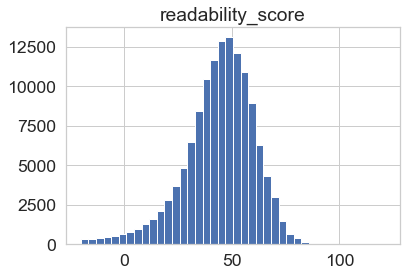

In [37]:
df_sub_lim.hist('readability_score', bins = 40)

In [32]:
scores = pd.DataFrame(df_sub_lim.groupby(df.publication).readability_score.mean()).sort_values('readability_score').reset_index(False)

In [33]:
scores

,publication,readability_score
0,Business Insider,21.265328
1,Reuters,37.455244
2,CNN,38.290545
3,Vox,38.478908
4,Buzzfeed News,40.347930
5,Breitbart,40.586160
6,Washington Post,42.715385
7,Fox News,44.798737
8,Guardian,45.830828
9,National Review,46.229192


## Flesch Readability Ease Score

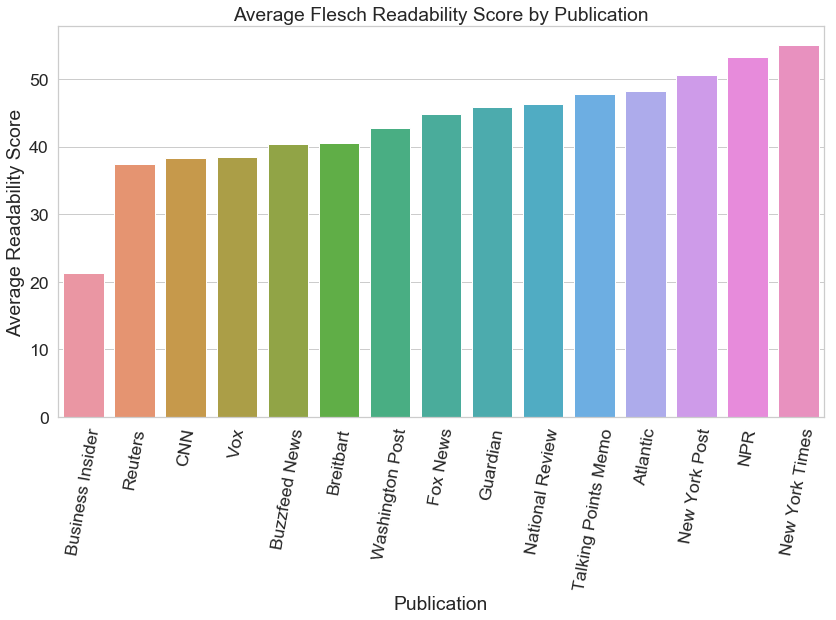

In [34]:
sns.set(style="whitegrid", font_scale = 1.6)
fig,ax = plt.subplots(figsize = (12,9))
sns.barplot(ax = ax, x = scores.publication, y = scores.readability_score)
plt.xticks(rotation=80)
plt.xlabel('Publication')
plt.ylabel('Average Readability Score')
plt.title('Average Flesch Readability Score by Publication')
plt.tight_layout()
fig.savefig('Flesch_Score_by_Publication.pdf')